# Lecture 5 Part 1: Real-World Financial Analysis - Tesla (TSLA) Case Study

## Introduction
This notebook is designed to replicate the financial analysis content from Lecture 5 Part 1 using real-world financial data from **Tesla (TSLA)**. We will use the `yfinance` library in Python to fetch the latest market data and calculate key financial ratios.

**Target Audience**: This tutorial is designed for students with **no prior Python experience**. The code blocks include detailed English comments to help you understand the meaning of each step.

**Learning Objectives**:
1.  Learn how to use Python to fetch financial statements of listed companies.
2.  Master the calculation methods for four major categories of financial metrics: **Profitability**, **Liquidity**, **Efficiency**, and **Returns**.
3.  Understand the business logic behind these metrics.

---

## Step 1: Setup

First, we need to import two powerful libraries:
-   `yfinance`: Used to download stock historical data and financial statements from Yahoo Finance.
-   `pandas`: Similar to Excel, used for processing tabular data in Python.

> **Note**: If you haven't installed these packages yet, please uncomment the first line of the code below (remove the `#`) and run it.

In [1]:
# !pip install yfinance pandas jinja2

import yfinance as yf
import pandas as pd

print("Setup complete! Libraries imported successfully.")

Setup complete! Libraries imported successfully.


## Step 2: Data Acquisition

We will fetch three major financial statements for Tesla (Ticker: **TSLA**):
1.  **Income Statement**: Reflects how much money the company made.
2.  **Balance Sheet**: Reflects what the company owns (Assets) and what it owes (Liabilities).
3.  **Cash Flow Statement**: Reflects the inflow and outflow of cash (we mainly use the first two in this lesson).

In [2]:
# 1. Create a Ticker object representing Tesla
import os
import pandas as pd

DATA_DIR = 'data'
income_path = os.path.join(DATA_DIR, 'tesla_income_stmt.xlsx')
balance_path = os.path.join(DATA_DIR, 'tesla_balance_sheet.xlsx')

# Prefer local backups when available to ensure the notebook runs without network access.
if os.path.exists(income_path) and os.path.exists(balance_path):
    print('Loading local Excel backup for preview...')
    income_stmt_local = pd.read_excel(income_path, index_col=0)
    balance_sheet_local = pd.read_excel(balance_path, index_col=0)

    print('--- Local Income Statement Backup (Preview) ---')
    display(income_stmt_local.head())

    print()
    print('--- Local Balance Sheet Backup (Preview) ---')
    display(balance_sheet_local.head())

else:
    try:
        ticker = yf.Ticker('TSLA')
        fin = ticker.financials
        bs = ticker.balance_sheet

        if fin is None or fin.empty or bs is None or bs.empty:
            raise ValueError('Empty data returned from yfinance')

        print('--- Raw Financials Data (First 5 columns) ---')
        display(fin.head())

        print()
        print('--- Raw Balance Sheet Data (First 5 columns) ---')
        display(bs.head())

    except Exception as e:
        print(f'Unable to fetch raw data from yfinance ({type(e).__name__}): {e}')
        raise


Loading local Excel backup for preview...


--- Local Income Statement Backup (Preview) ---


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2025-12-31,-133380000.0,0.27,1.225800e+10,-494000000.0,-494000000.0,3.794000e+09,6.148000e+09,7.773300e+10,1.176400e+10,5.616000e+09,...,338000000.0,1.680000e+09,4.849000e+09,1.224500e+10,6.411000e+09,5.834000e+09,1.709400e+10,7.773300e+10,9.482700e+10,9.482700e+10
2024-12-31,-136800000.0,0.20,1.539200e+10,-684000000.0,-684000000.0,7.130000e+09,5.368000e+09,8.024000e+10,1.470800e+10,9.340000e+09,...,350000000.0,1.569000e+09,7.760000e+09,9.690000e+09,4.540000e+09,5.150000e+09,1.745000e+10,8.024000e+10,9.769000e+10,9.769000e+10
2023-12-31,0.0,0.21,1.479600e+10,0.0,0.0,1.499900e+10,4.667000e+09,7.911300e+10,1.479600e+10,1.012900e+10,...,156000000.0,1.066000e+09,8.891000e+09,8.769000e+09,3.969000e+09,4.800000e+09,1.766000e+10,7.911300e+10,9.677300e+10,9.677300e+10
2022-12-31,-14080000.0,0.08,1.783300e+10,-176000000.0,-176000000.0,1.258300e+10,3.747000e+09,6.060900e+10,1.765700e+10,1.391000e+10,...,191000000.0,2.970000e+08,1.383200e+10,7.021000e+09,3.075000e+09,3.946000e+09,2.085300e+10,6.060900e+10,8.146200e+10,8.146200e+10
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



--- Local Balance Sheet Backup (Preview) ---


,Treasury Shares Number,Ordinary Shares Number,Share Issued,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,...,Finished Goods,Work In Process,Raw Materials,Receivables,Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2025-12-31,NaN,3.751000e+09,3.751000e+09,1.471900e+10,8.074800e+10,9.029000e+10,3.692800e+10,8.074800e+10,6.566000e+09,8.213700e+10,...,4.849000e+09,1.725000e+09,4.522000e+09,4.576000e+09,4.576000e+09,4.405900e+10,2.754600e+10,1.651300e+10,1.890000e+09,1.462300e+10
2024-12-31,NaN,3.216000e+09,3.216000e+09,1.362300e+10,7.144300e+10,8.079100e+10,2.953900e+10,7.144300e+10,5.745000e+09,7.291300e+10,...,3.940000e+09,1.532000e+09,5.242000e+09,4.418000e+09,4.418000e+09,3.656300e+10,2.042400e+10,1.613900e+10,1.753000e+09,1.438600e+10
2023-12-31,0.0,3.185000e+09,3.185000e+09,9.573000e+09,6.201900e+10,6.729100e+10,2.086800e+10,6.201900e+10,4.916000e+09,6.263400e+10,...,5.049000e+09,2.016000e+09,5.390000e+09,3.508000e+09,3.508000e+09,2.909400e+10,1.269600e+10,1.639800e+10,4.950000e+08,1.590300e+10
2022-12-31,NaN,3.164000e+09,3.164000e+09,5.748000e+09,4.411100e+10,4.674900e+10,1.420800e+10,4.411100e+10,3.703000e+09,4.470400e+10,...,3.475000e+09,2.385000e+09,6.137000e+09,2.952000e+09,2.952000e+09,2.218500e+10,5.932000e+09,1.625300e+10,2.288000e+09,1.396500e+10
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 2. Data Acquisition (Robust Mode)
import os
import pandas as pd
import yfinance as yf

USE_LOCAL_DATA = True  # Set to True to use local Excel files
DATA_DIR = 'data'


def load_local_backup(data_dir=DATA_DIR):
    income_stmt = pd.read_excel(os.path.join(data_dir, 'tesla_income_stmt.xlsx'), index_col=0)
    balance_sheet = pd.read_excel(os.path.join(data_dir, 'tesla_balance_sheet.xlsx'), index_col=0)
    cash_flow = pd.read_excel(os.path.join(data_dir, 'tesla_cash_flow.xlsx'), index_col=0)
    return income_stmt, balance_sheet, cash_flow


def ensure_datetime_index(df):
    if isinstance(df.index, pd.DatetimeIndex):
        return df
    if df.index.dtype == 'object':
        df = df.copy()
        df.index = pd.to_datetime(df.index, errors='coerce')
    return df


def try_filter_from_date(df, start_date):
    if not isinstance(df.index, pd.DatetimeIndex):
        print('Warning: index is not datetime-like; skipping date filter for this table.')
        return df
    filtered = df[df.index >= pd.Timestamp(start_date)]
    if filtered.empty and not df.empty:
        print('Warning: filtered table is empty; using unfiltered data.')
        return df
    return filtered


income_stmt = balance_sheet = cash_flow = None
loaded_local = False

if USE_LOCAL_DATA and os.path.exists(DATA_DIR):
    print('Loading data from local backup...')
    try:
        income_stmt, balance_sheet, cash_flow = load_local_backup()
        loaded_local = True
        print('Data loaded successfully from Excel.')
    except Exception as e:
        print(f'Error loading local data: {e}, falling back to yfinance.')
        loaded_local = False

if not loaded_local:
    try:
        ticker = yf.Ticker('TSLA')
        income_stmt = ticker.financials.transpose()
        balance_sheet = ticker.balance_sheet.transpose()
        cash_flow = ticker.cashflow.transpose()

        income_stmt = ensure_datetime_index(income_stmt)
        balance_sheet = ensure_datetime_index(balance_sheet)
        cash_flow = ensure_datetime_index(cash_flow)

    except Exception as e:
        print(f'Error fetching data from yfinance ({type(e).__name__}): {e}')
        income_stmt = balance_sheet = cash_flow = pd.DataFrame()

    if (
        income_stmt.empty
        or balance_sheet.empty
        or cash_flow.empty
        or not isinstance(income_stmt.index, pd.DatetimeIndex)
        or not isinstance(balance_sheet.index, pd.DatetimeIndex)
        or not isinstance(cash_flow.index, pd.DatetimeIndex)
    ):
        backup_path = os.path.join(DATA_DIR, 'tesla_income_stmt.xlsx')
        if os.path.exists(backup_path):
            print('Falling back to local Excel backup in ./data ...')
            income_stmt, balance_sheet, cash_flow = load_local_backup()
        else:
            raise RuntimeError('No valid financial statement data available (yfinance failed and no local backup found).')

# Ensure datetime index for Excel-loaded tables (if applicable)
income_stmt = ensure_datetime_index(income_stmt)
balance_sheet = ensure_datetime_index(balance_sheet)
cash_flow = ensure_datetime_index(cash_flow)

# [FILTER] Remove 2021 Data as requested
FILTER_START_DATE = '2022-01-01'
print(f"Filtering data to include only records on or after {FILTER_START_DATE}...")

income_stmt = try_filter_from_date(income_stmt, FILTER_START_DATE)
balance_sheet = try_filter_from_date(balance_sheet, FILTER_START_DATE)
cash_flow = try_filter_from_date(cash_flow, FILTER_START_DATE)

# Print the processed data
print('--- Transposed Income Statement (Last 3 Years) ---')
display(income_stmt.head(3))

print()
print('--- Transposed Balance Sheet (Last 3 Years) ---')
display(balance_sheet.head(3))

print()
print('--- Transposed Cash Flow Statement (Last 3 Years) ---')
display(cash_flow.head(3))


Loading data from local backup...
Data loaded successfully from Excel.
Filtering data to include only records on or after 2022-01-01...
--- Transposed Income Statement (Last 3 Years) ---


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2025-12-31,-133380000.0,0.27,1.225800e+10,-494000000.0,-494000000.0,3.794000e+09,6.148000e+09,7.773300e+10,1.176400e+10,5.616000e+09,...,338000000.0,1.680000e+09,4.849000e+09,1.224500e+10,6.411000e+09,5.834000e+09,1.709400e+10,7.773300e+10,9.482700e+10,9.482700e+10
2024-12-31,-136800000.0,0.20,1.539200e+10,-684000000.0,-684000000.0,7.130000e+09,5.368000e+09,8.024000e+10,1.470800e+10,9.340000e+09,...,350000000.0,1.569000e+09,7.760000e+09,9.690000e+09,4.540000e+09,5.150000e+09,1.745000e+10,8.024000e+10,9.769000e+10,9.769000e+10
2023-12-31,0.0,0.21,1.479600e+10,0.0,0.0,1.499900e+10,4.667000e+09,7.911300e+10,1.479600e+10,1.012900e+10,...,156000000.0,1.066000e+09,8.891000e+09,8.769000e+09,3.969000e+09,4.800000e+09,1.766000e+10,7.911300e+10,9.677300e+10,9.677300e+10



--- Transposed Balance Sheet (Last 3 Years) ---


,Treasury Shares Number,Ordinary Shares Number,Share Issued,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,...,Finished Goods,Work In Process,Raw Materials,Receivables,Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2025-12-31,NaN,3.751000e+09,3.751000e+09,1.471900e+10,8.074800e+10,9.029000e+10,3.692800e+10,8.074800e+10,6.566000e+09,8.213700e+10,...,4.849000e+09,1.725000e+09,4.522000e+09,4.576000e+09,4.576000e+09,4.405900e+10,2.754600e+10,1.651300e+10,1.890000e+09,1.462300e+10
2024-12-31,NaN,3.216000e+09,3.216000e+09,1.362300e+10,7.144300e+10,8.079100e+10,2.953900e+10,7.144300e+10,5.745000e+09,7.291300e+10,...,3.940000e+09,1.532000e+09,5.242000e+09,4.418000e+09,4.418000e+09,3.656300e+10,2.042400e+10,1.613900e+10,1.753000e+09,1.438600e+10
2023-12-31,0.0,3.185000e+09,3.185000e+09,9.573000e+09,6.201900e+10,6.729100e+10,2.086800e+10,6.201900e+10,4.916000e+09,6.263400e+10,...,5.049000e+09,2.016000e+09,5.390000e+09,3.508000e+09,3.508000e+09,2.909400e+10,1.269600e+10,1.639800e+10,4.950000e+08,1.590300e+10



--- Transposed Cash Flow Statement (Last 3 Years) ---


,Free Cash Flow,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,...,Asset Impairment Charge,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Depreciation,Operating Gains Losses,Net Foreign Currency Exchange Gain Loss,Gain Loss On Sale Of PPE,Net Income From Continuing Operations
2025-12-31,6.220000e+09,-5.650000e+09,5.586000e+09,NaN,-8.527000e+09,292000000.0,NaN,1.761600e+10,1.703700e+10,171000000.0,...,362000000.0,1.230000e+08,1.230000e+08,6.148000e+09,6.148000e+09,6.148000e+09,520000000.0,452000000.0,68000000.0,3.855000e+09
2024-12-31,3.581000e+09,-2.881000e+09,5.744000e+09,NaN,-1.134200e+10,277000000.0,1.331000e+09,1.703700e+10,1.718900e+10,-141000000.0,...,335000000.0,4.770000e+08,4.770000e+08,5.368000e+09,5.368000e+09,5.368000e+09,-662000000.0,-73000000.0,-589000000.0,7.153000e+09
2023-12-31,4.357000e+09,-1.815000e+09,3.931000e+09,NaN,-8.899000e+09,126000000.0,1.119000e+09,1.718900e+10,1.692400e+10,4000000.0,...,463000000.0,-6.349000e+09,-6.349000e+09,4.667000e+09,4.667000e+09,4.667000e+09,-144000000.0,-144000000.0,0.0,1.497400e+10


In [4]:
# [SETUP] Define Visualization Function (Run this first, call it later)
def plot_trend():
    print('Generating Market Capitalization Chart... (This may take a moment)')

    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    import yfinance as yf

    ticker = 'TSLA'
    data_dir = 'data'

    daily_price_path = os.path.join(data_dir, 'tesla_daily_price.xlsx')
    q_bs_path = os.path.join(data_dir, 'tesla_quarterly_balance.xlsx')
    q_fin_path = os.path.join(data_dir, 'tesla_quarterly_financials.xlsx')

    # --- Load local cache if available ---
    daily_price = pd.DataFrame()
    q_bs = pd.DataFrame()
    q_fin = pd.DataFrame()

    if os.path.exists(daily_price_path):
        daily_price = pd.read_excel(daily_price_path, index_col=0)
        daily_price.index = pd.to_datetime(daily_price.index).tz_localize(None)

    if os.path.exists(q_bs_path):
        q_bs = pd.read_excel(q_bs_path, index_col=0)
        q_bs.index = pd.to_datetime(q_bs.index)
        q_bs = q_bs.sort_index()

    if os.path.exists(q_fin_path):
        q_fin = pd.read_excel(q_fin_path, index_col=0)
        q_fin.index = pd.to_datetime(q_fin.index)
        q_fin = q_fin.sort_index()

    # --- Fallback to yfinance when cache is missing ---
    t = None
    if daily_price.empty:
        print('Local daily price not found; fetching from yfinance...')
        t = yf.Ticker(ticker)
        daily_price = t.history(start='2024-01-01', end='2025-12-31', interval='1d')
        daily_price.index = daily_price.index.tz_localize(None)

    if q_bs.empty:
        print('Local quarterly balance sheet not found; fetching from yfinance...')
        t = t or yf.Ticker(ticker)
        q_bs = t.quarterly_balance_sheet.transpose()
        q_bs.index = pd.to_datetime(q_bs.index)
        q_bs = q_bs.sort_index()

    if q_fin.empty:
        t = t or yf.Ticker(ticker)
        q_fin = t.quarterly_financials.transpose()
        q_fin.index = pd.to_datetime(q_fin.index)
        q_fin = q_fin.sort_index()

    # --- Share count (prefer statement-based series; fallback to current shares) ---
    shares_series = None
    possible_share_cols = ['Ordinary Shares Number', 'Share Issued', 'Basic Average Shares']

    for col in possible_share_cols:
        if col in q_bs.columns:
            shares_series = q_bs[col]
            break
        if col in q_fin.columns:
            shares_series = q_fin[col]
            break
        # partial match
        for c in list(q_bs.columns) + list(q_fin.columns):
            if col in c:
                shares_series = q_bs[c] if c in q_bs.columns else q_fin[c]
                break
        if shares_series is not None:
            break

    if shares_series is None:
        current_shares = None
        try:
            t = t or yf.Ticker(ticker)
            current_shares = t.info.get('sharesOutstanding', None)
        except Exception:
            current_shares = None

        if current_shares:
            shares_series = pd.Series(current_shares, index=daily_price.index)
        else:
            print('Warning: share count unavailable; market cap cannot be computed.')
            return

    # Resample shares to daily and align to price index
    shares_series.index = pd.to_datetime(shares_series.index, errors='coerce')
    shares_series = shares_series.dropna().sort_index()
    shares_daily = shares_series.resample('D').ffill().reindex(daily_price.index, method='ffill')

    if daily_price.empty or shares_daily is None or shares_daily.empty:
        print('Data unavailable for market cap chart.')
        return

    mkt_cap = daily_price['Close'] * shares_daily / 1e9  # Billions

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 6))
    plt.plot(mkt_cap.index, mkt_cap, color='#D55E00', linewidth=2)
    plt.title('Tesla Daily Market Capitalization (2024-2025 (or Latest Available))', fontsize=14, fontweight='bold')
    plt.ylabel('Market Cap ($ Billions)', fontsize=12)
    plt.grid(True, alpha=0.3)

    if not mkt_cap.empty:
        max_val = mkt_cap.max()
        max_date = mkt_cap.idxmax()
        plt.annotate(
            f'Peak: ${max_val:.1f}B',
            xy=(max_date, max_val),
            xytext=(max_date, max_val + 50),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ha='center',
        )

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.tight_layout()
    plt.show()

    print('Visualization Complete.')


## Step 2.1: Understanding Financial Statements with Real Data

We will now break down the core financial concepts and verify them **immediately** using Tesla's real-world data (latest available).

**Note**: We use the `latest_date` variable to ensure checking the most recent report.


### 1. The "Anchor": Balance Sheet
**Core Equation**: $$Assets (A) = Liabilities (L) + Equity (E)$$

*   **Assets**: Where the money went (Investments).
*   **L+E**: Where the money came from (Financing).

Let's verify this equation for Tesla:


In [5]:
# Get latest date
latest_date = balance_sheet.index[0]
print(f"Analyzing data for: {latest_date}")

# 1. Fetch Values
total_assets = balance_sheet.loc[latest_date, 'Total Assets']
total_liab_nm = balance_sheet.loc[latest_date, 'Total Liabilities Net Minority Interest']
stockholders_equity = balance_sheet.loc[latest_date, 'Stockholders Equity']

# Robust Logic: Assets = Liabilities + Equity + Minority Interest
# Try to fetch Minority Interest
try:
    if 'Minority Interest' in balance_sheet.columns:
        minority_interest = balance_sheet.loc[latest_date, 'Minority Interest']
    else:
        minority_interest = 0
except:
    minority_interest = 0

if pd.isna(minority_interest): minority_interest = 0

# 2. Calculate
total_liab_equity = total_liab_nm + stockholders_equity + minority_interest
difference = total_assets - total_liab_equity

# 3. Verify
print(f"Total Liabilities (Net Minority): ${total_liab_nm:,.0f}")
print(f"Stockholders Equity:             ${stockholders_equity:,.0f}")
print(f"Minority Interest:               ${minority_interest:,.0f}")
print(f"Total Assets:              ${total_assets:,.0f}")
print(f"Total Liab + Equity:       ${total_liab_equity:,.0f}")
print(f"Difference:                ${difference:,.0f}")

Analyzing data for: 2025-12-31 00:00:00
Total Liabilities (Net Minority): $54,941,000,000
Stockholders Equity:             $82,137,000,000
Minority Interest:               $728,000,000
Total Assets:              $137,806,000,000
Total Liab + Equity:       $137,806,000,000
Difference:                $0


### 2. The Link: From Income to Equity
**Retained Earnings (RE)** connects the Income Statement and the Balance Sheet.

**Formula**: $$RE_{Ending} = RE_{Beginning} + Net\ Income - Dividends$$

Did Tesla's Retained Earnings grow exactly by its Net Income? Let's trace it.


In [6]:
# 1. Get Retained Earnings (Current & Previous Year)
re_col = 'Retained Earnings'
if re_col not in balance_sheet.columns:
    # Try to find a similar column
    for col in balance_sheet.columns:
        if 'Retained' in str(col) and 'Earnings' in str(col):
            re_col = col
            break

if re_col in balance_sheet.columns:
    re_ending = balance_sheet.loc[balance_sheet.index[0], re_col]
    re_beginning = balance_sheet.loc[balance_sheet.index[1], re_col]
else:
    print("Warning: 'Retained Earnings' column not found.")
    re_ending = 0
    re_beginning = 0

# 2. Get Net Income & Dividends
net_income = income_stmt.loc[latest_date, 'Net Income']
dividends = 0 # Tesla pays no dividends

# 3. Calculate Changes
actual_change_re = re_ending - re_beginning
theoretical_change = net_income - dividends

print(f"Net Income:                ${net_income:,.0f}")
print(f"Actual Change in RE:       ${actual_change_re:,.0f}")
print(f"Difference:                ${actual_change_re - theoretical_change:,.0f}")

print("\nIs there a difference?")

Net Income:                $3,794,000,000
Actual Change in RE:       $3,794,000,000
Difference:                $0

Is there a difference?


### 3. Free Cash Flow Analysis
**Key Concept**: **Free Cash Flow (FCF)** represents the cash a company generates after accounting for cash outflows to support operations and maintain its capital assets.

$$ \text{Free Cash Flow} = \text{Operating Cash Flow} - \text{Capital Expenditure} $$

FCF is a critical metric because it allows a company to pursue opportunities that enhance shareholder value, such as developing new products, paying dividends, or reducing debt.

In [7]:
# 1. Fetch Operating Cash Flow
operating_cash_flow = cash_flow.loc[latest_date, 'Operating Cash Flow']

# 2. Fetch Capital Expenditure
try:
    # CapEx is usually negative in Yahoo Finance data
    capex = cash_flow.loc[latest_date, 'Capital Expenditure']
except KeyError:
    print("Capital Expenditure column not found.")
    capex = 0

# 3. Calculate Free Cash Flow
# Since CapEx is negative, we add it to subtract the magnitude.
# Alternatively, FCF = OCF - (-CapEx)
free_cash_flow = operating_cash_flow + capex

print(f"Operating Cash Flow:       ${operating_cash_flow:,.0f}")
print(f"+ Capital Expenditure:     ${capex:,.0f} (Negative implies outflow)")
print(f"= Free Cash Flow:          ${free_cash_flow:,.0f}")


Operating Cash Flow:       $14,747,000,000
+ Capital Expenditure:     $-8,527,000,000 (Negative implies outflow)
= Free Cash Flow:          $6,220,000,000


### 4. Liquidity Check
**Final Check**: Does the cash at the bottom of the Cash Flow Statement match the cash on the Balance Sheet?


In [8]:
# 1. Balance Sheet Cash
cash_bs = balance_sheet.loc[latest_date, 'Cash And Cash Equivalents']

# 2. Cash Flow Ending Cash
cash_cf = cash_flow.loc[latest_date, 'End Cash Position']

print(f"Balance Sheet Cash:        ${cash_bs:,.0f}")
print(f"Cash Flow End Cash:        ${cash_cf:,.0f}")

# Calculate Difference
diff = cash_bs - cash_cf
print(f"Difference:                ${diff:,.0f}")
print("Note: Slight differences can occur due to 'Restricted Cash' classification.")
print("Explanation of difference source:")
print("Restricted cash included in prepaid expenses and other current assets = 389")
print("Restricted cash included in other non-current assets = 714")

Balance Sheet Cash:        $16,513,000,000
Cash Flow End Cash:        $17,616,000,000
Difference:                $-1,103,000,000
Note: Slight differences can occur due to 'Restricted Cash' classification.
Explanation of difference source:
Restricted cash included in prepaid expenses and other current assets = 389
Restricted cash included in other non-current assets = 714


## [Preview] Market Capitalization Trend (2024-2025)
Below is a preview of the market capitalization trend we will conclude with.


Generating Market Capitalization Chart... (This may take a moment)


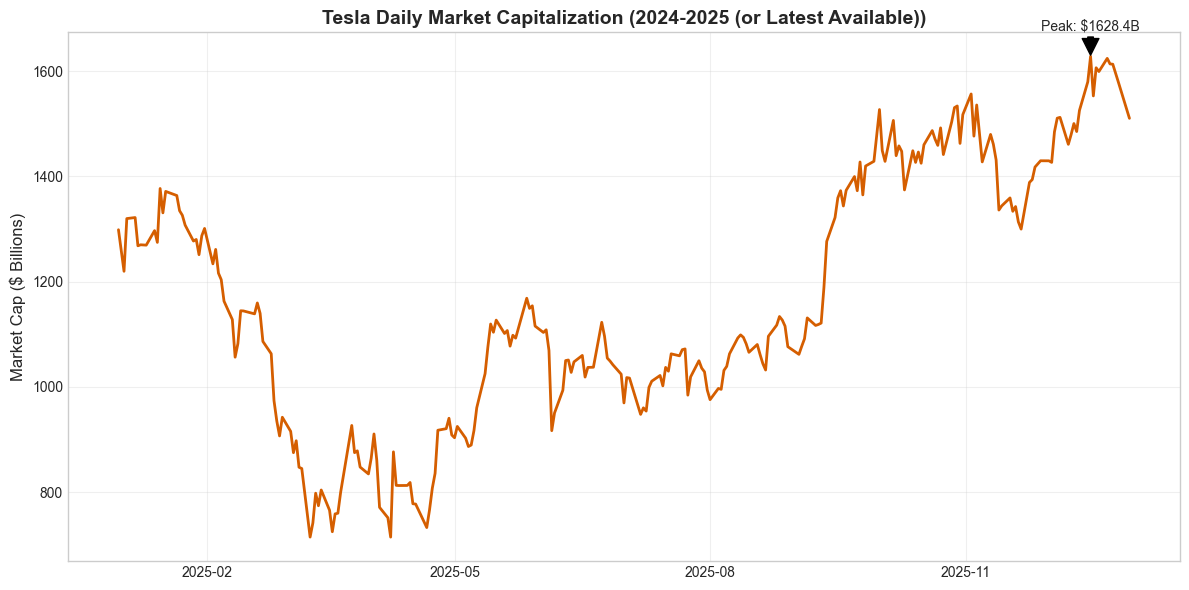

Visualization Complete.


In [9]:
# Call the pre-defined function
plot_trend()